# **Vehicle Sales and Market Trends**
Dataset Description:

The **"Vehicle Sales and Market Trends Dataset"** provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

## Key Features:
- Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.
- Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.
- Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.
- Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

## Potential Use Cases:
- Market Analysis: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage.
- Predictive Modeling: Data scientists can employ this dataset to develop predictive models for estimating vehicle prices based on various attributes.
- Business Insights: Automotive industry professionals, dealerships, and financial institutions can derive insights into consumer preferences, market demand, and pricing strategies.
- Format: The dataset is typically presented in tabular format (e.g., CSV) with rows representing individual vehicle sales transactions and columns representing different attributes associated with each transaction.
- Data Integrity: Efforts have been made to ensure the accuracy and reliability of the data; however, users are encouraged to perform their own validation and verification processes.
- Update Frequency: The dataset may be periodically updated to include new sales transactions and market data, providing fresh insights into ongoing trends in the automotive industry.

## Imports

In [1]:
# all needed imports
from scipy import stats as st
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

-----


## Initialization


In [2]:
# dataset variable
vehicle_sales_df = pd.read_csv('D:/Datasets/car_prices.csv')


In [3]:
# check for the missing values
vehicle_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
# check the dataset
vehicle_sales_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


<font color = green> Finding(s) </font>
- We will need to do some data exploratory analysis to find out wheter the missing values could affect for our analysis.

**Important Note**

Columns Description:

- `year`: The manufacturing year of the vehicle.
- `make`: The brand or manufacturer of the vehicle (e.g., Ford, Toyota, Honda).
- `model`: The specific model name of the vehicle (e.g., Civic, Accord, Camry).
- `trim`: The trim level or variation of the vehicle model (e.g., LX, EX, Limited).
- `body`: The body type of the vehicle (e.g., sedan, SUV, truck).
- `transmission`: The type of transmission of the vehicle (e.g., automatic, manual).
- `vin`: The Vehicle Identification Number, a unique code assigned to each vehicle for identification purposes.
- `state`: The state where the vehicle is registered.
- `condition`: A numerical rating indicating the condition of the vehicle.
- `odometer`: The mileage or distance traveled by the vehicle as recorded by the odometer.
- `color`: The exterior color of the vehicle.
- `interior`: The interior color or trim of the vehicle.
- `seller`: Information about the seller of the vehicle (e.g., individual, dealership).
- `mmr`: Manheim Market Report value, an estimate of the market value of the vehicle.
- `sellingprice`: The selling price of the vehicle in the sale transaction.
- `saledate`: The date when the vehicle was sold.

------

## Data Distribution
- We will look for the distribution of this dataset


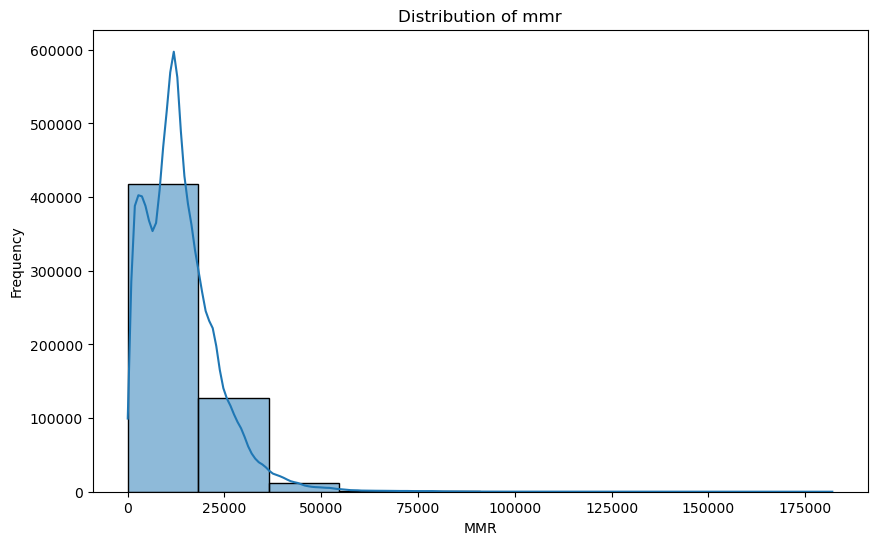

In [5]:
# MMR distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicle_sales_df, x='mmr', bins=10, kde=True)
plt.title('Distribution of mmr')
plt.xlabel('MMR')
plt.ylabel('Frequency')
plt.show()

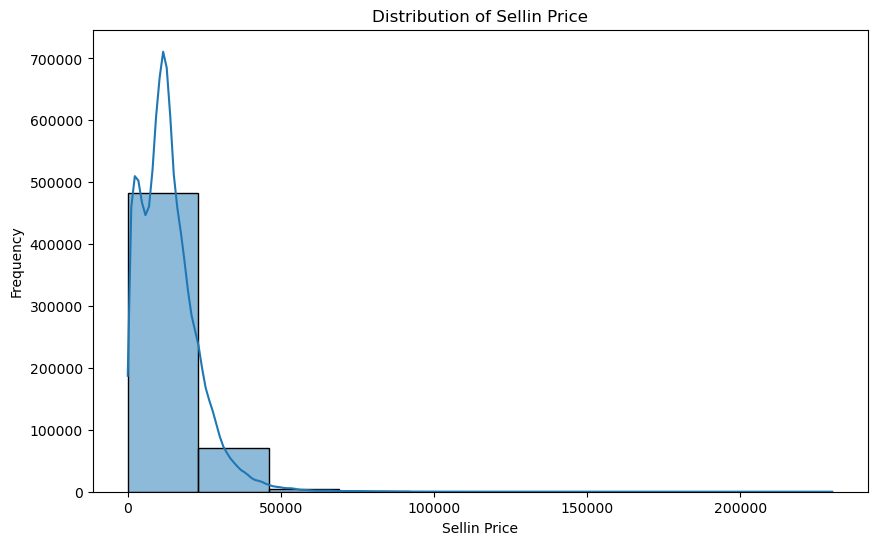

In [6]:
# selling price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicle_sales_df, x='sellingprice', bins=10, kde=True)
plt.title('Distribution of Sellin Price')
plt.xlabel('Sellin Price')
plt.ylabel('Frequency')
plt.show()

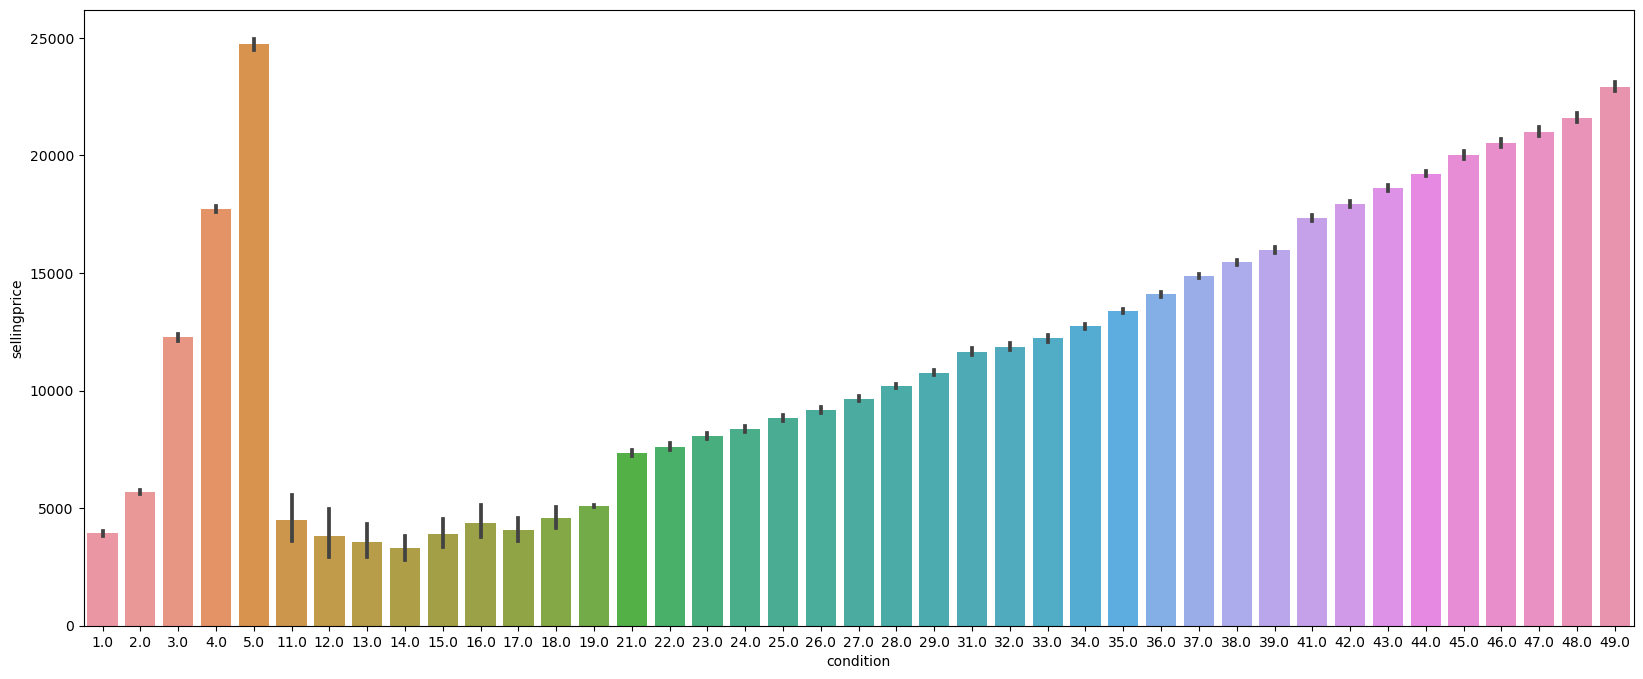

In [7]:
# vehicle condition
plt.figure(figsize=(20,8))
sns.barplot(data = vehicle_sales_df.sort_values(by='condition'), x = 'condition', y = 'sellingprice' );

<font color = green> Finding(s) </font>
- Let's assume condition's values are the rating of each vehicle. We found that 5.0 has the highest frequency according to the selling price.
- We still do not know the scale of the condition as we can see the range of this value is from 1.0 to 49.0. 
- This concludes (temporarily) that the condition values may have the outliers or something with the input. 

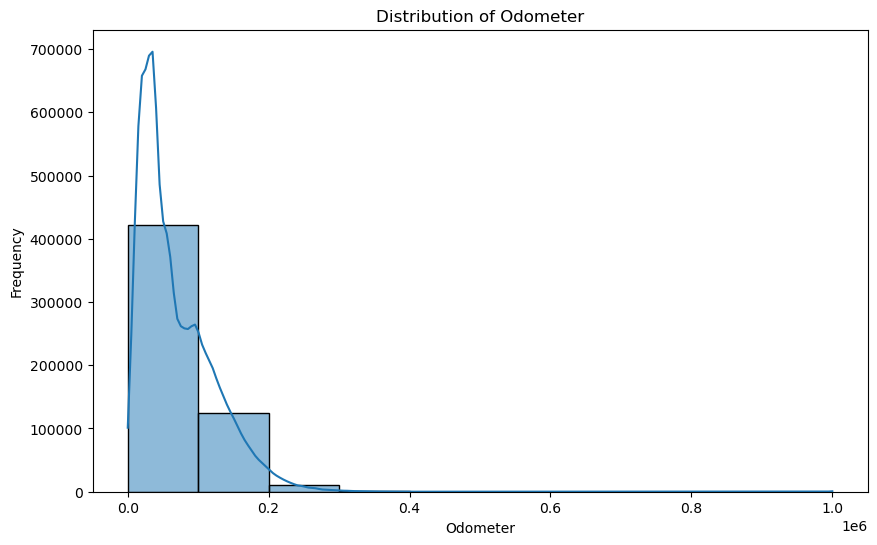

In [8]:
# odometer
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicle_sales_df, x='odometer', bins=10, kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

In [9]:
print(vehicle_sales_df['odometer'].max())
print(vehicle_sales_df['odometer'].min())

999999.0
1.0


<font color = green> Finding(s) </font>

- We found that the maximum of odometer value is 99999.0 and the minimum is 1.0. The maximum of the number can indicate the probability of an outlier, while the minimum can be either outlier or a brand new car.

## Market Analysis

### Correlation Matrix

In [10]:
correlation_df = vehicle_sales_df.corr()
correlation_df 

C:\Users\user\AppData\Local\Temp\ipykernel_8672\1867707403.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df = vehicle_sales_df.corr()


,year,condition,odometer,mmr,sellingprice
year,1.000000,0.340320,-0.772737,0.596631,0.586480
condition,0.340320,1.000000,-0.318188,0.281415,0.321944
odometer,-0.772737,-0.318188,1.000000,-0.588113,-0.582393
mmr,0.596631,0.281415,-0.588113,1.000000,0.983635
sellingprice,0.586480,0.321944,-0.582393,0.983635,1.000000


In [11]:
# Select relevant columns for correlation analysis
columns_of_interest = ['sellingprice', 'condition', 'odometer', 'year']
correlation_matrix = vehicle_sales_df[columns_of_interest].corr()

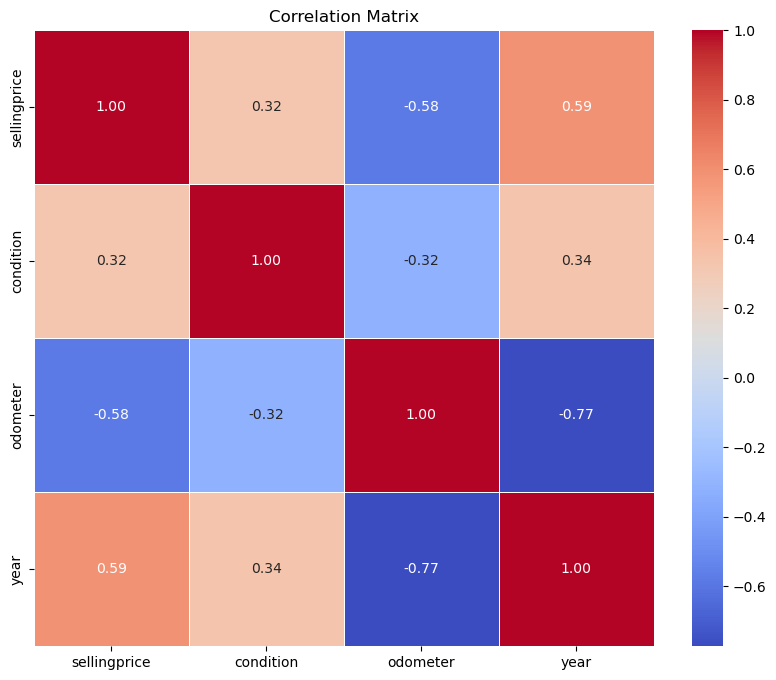

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<font color = green> Finding(s) </font>

1. Year and Condition:
    - Moderate positive correlation (0.340320).
    - Indicates that newer vehicles tend to have better condition ratings, which is expected as newer vehicles generally have less wear and tear.

2. Year and Odometer:
    - Strong negative correlation (-0.772737).
    - Indicates that as the manufacturing year of vehicles increases, their odometer readings tend to decrease.
    - This correlation suggests that newer vehicles generally have lower mileage, which is consistent with expectations.

3. Year and MMR (Manheim Market Report):
    - Moderate positive correlation (0.596631).
    - Indicates that newer vehicles tend to have higher MMR values, reflecting their higher market value.
    - This correlation aligns with expectations as newer vehicles typically command higher prices in the market.

4. Year and Selling Price:
    - Moderate positive correlation (0.586480).
    - Similar to the correlation with MMR, newer vehicles tend to have higher selling prices.
    - This correlation suggests that selling prices are influenced by the manufacturing year of vehicles.

5. Condition and Odometer:
    - Weak negative correlation (-0.318188).
    - Indicates that vehicles with higher condition ratings tend to have lower odometer readings.
    - This correlation suggests that vehicles in better condition typically have lower mileage.

6. Condition and MMR:
    - Weak positive correlation (0.281415).
    - Indicates a slight tendency for vehicles with better condition ratings to have higher MMR values.
    - This correlation suggests that vehicle condition may influence market value to some extent.

7. Condition and Selling Price:
    - Moderate positive correlation (0.321944).
    - Indicates that vehicles with better condition ratings tend to have higher selling prices.
    - This correlation suggests that buyers are willing to pay more for vehicles in better condition.

8. Odometer and MMR:
    - Moderate negative correlation (-0.588113).
    - Indicates that vehicles with higher odometer readings tend to have lower MMR values.
    - This correlation suggests that mileage negatively impacts market value.

9. Odometer and Selling Price:
    - Moderate negative correlation (-0.582393).
    - Similar to the correlation with MMR, vehicles with higher odometer readings tend to have lower selling prices.
    - This correlation indicates that mileage has a negative effect on the selling price of vehicles.

10. MMR and Selling Price:
    - Strong positive correlation (0.983635).
    - Indicates a very strong relationship between MMR values and selling prices.
    - This correlation suggests that MMR values are highly predictive of selling prices, with higher MMR values associated with higher selling prices.

In [13]:
vehicle_sales_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


1. Year:
    - The dataset contains vehicle sales transactions spanning from 1982 to 2015, with an average manufacturing year of around 2010.
    - Most vehicles sold fall within the range of model years from 2007 to 2013, as indicated by the interquartile range (25th to 75th percentiles).

2. Condition:
    - The condition ratings range from 1 to 49, with an average rating of approximately 30.67.
    - There is variability in the condition ratings, with a standard deviation of 13.40, indicating differences in the perceived condition of vehicles.

3. Odometer:
    - The odometer readings vary widely, with a mean of approximately 68,320 miles and a standard deviation of 53,398 miles.
    - The majority of vehicles have odometer readings between 28,371 and 99,109 miles, as indicated by the interquartile range.

4. MMR (Manheim Market Report):
    - The MMR values range from 25 to 182,000, with an average value of around 13,769.
    - There is significant variability in MMR values, with a standard deviation of 9,679, indicating differences in estimated market values for vehicles.

5. Selling Price:
    - Selling prices vary widely, ranging from 1 to 230,000, with an average selling price of approximately 13,611.
    - The interquartile range for selling prices is from 6,900 to 18,200, indicating where the majority of selling prices fall.

------

### Pricing Fluctuations

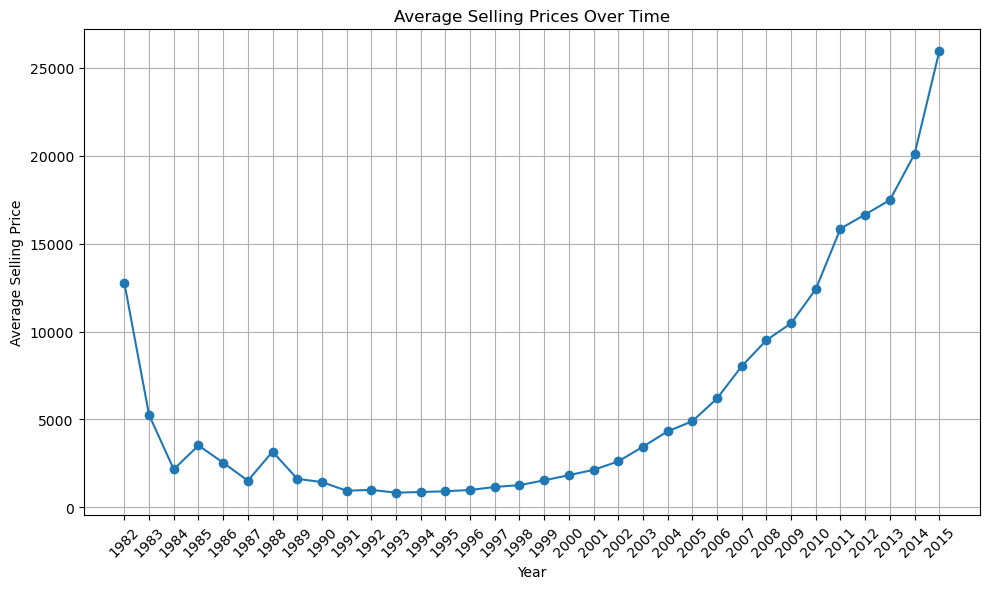

In [14]:
# Group the data by year and calculate the average selling price for each year
average_prices_by_year = vehicle_sales_df.groupby('year')['sellingprice'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_year.index, average_prices_by_year.values, marker='o', linestyle='-')
plt.title('Average Selling Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.xticks(average_prices_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

<font color = green> Finding(s) </font>
- If we take from the sample, let's say the year relevancy data which we can begin from 2007 or perhaps start from 2010, there is no fluctuation in there where the average selling price keeps growing year by year.

-----

## Predictive Modeling

### Data Modeling
- We will try to predict the outcome from the year 2015. We will take 2 sample of outcomes from 2016 to 2017. The reason we start from 2007 to 2015 because we as we know, the best to analyze is to put few years back at least not too long for data relevancy.

In [15]:
# Missing values check
missing_values = vehicle_sales_df['sellingprice'].isnull().sum()
print("Number of missing values in selling price:", missing_values)

Number of missing values in selling price: 12


- We miss only 12 rows, let's try to impute them with median.

In [16]:
# Replace missing values with median
median_selling_price = vehicle_sales_df['sellingprice'].median()
vehicle_sales_df['sellingprice'].fillna(median_selling_price, inplace=True)

In [17]:
# Prepare data for model training
X_train = vehicle_sales_df[vehicle_sales_df['year'].between(2007, 2015)]['year'].values.reshape(-1, 1)
y_train = vehicle_sales_df[vehicle_sales_df['year'].between(2007, 2015)]['sellingprice'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict average selling prices for 2016 and 2017
X_pred = np.array([2016, 2017]).reshape(-1, 1)
predicted_prices = model.predict(X_pred)



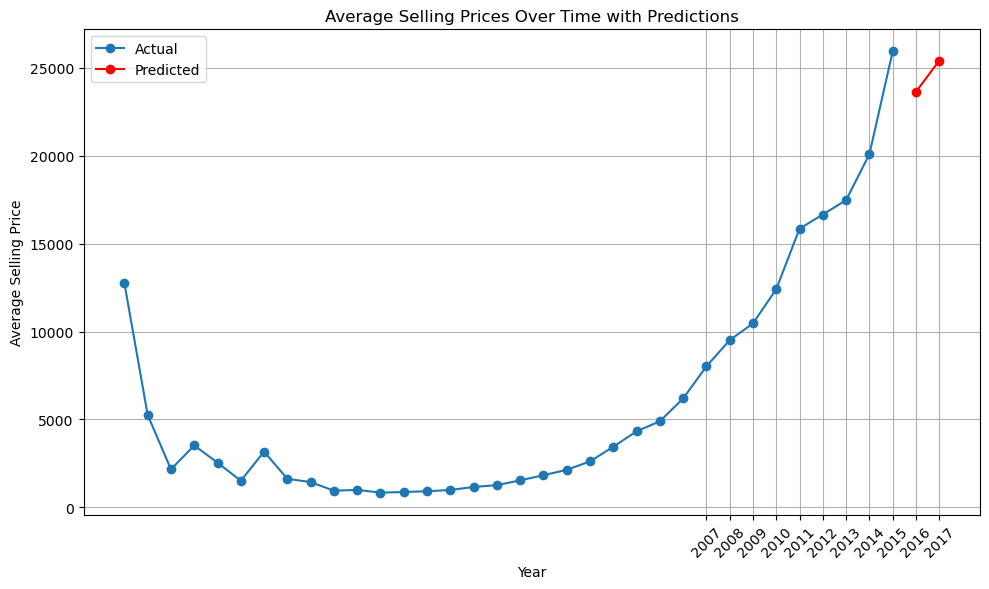

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_year.index, average_prices_by_year.values, marker='o', linestyle='-', label='Actual')
plt.plot([2016, 2017], predicted_prices, marker='o', linestyle='-', color='red', label='Predicted')
plt.title('Average Selling Prices Over Time with Predictions')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.xticks(np.arange(2007, 2018, 1), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<font color = green> Finding(s) </font>
- As we can see, from the plot of predictive modeling tends to slightly decrease, despite it increases after, the result of 2017 still considers lower than 2015.

## Insights and Recommendations
<font color = green> Business Insights</font>
- **Impact on Pricing Strategies:**
    - Dealerships and sellers rely on accurate pricing predictions to determine optimal pricing strategies for their inventory. A decrease in predicted selling prices may necessitate adjustments to pricing strategies, such as lowering listing prices or offering incentives to attract buyers.

- **Strategic Decision-Making:**
    - Executives and decision-makers use predictive modeling insights to inform strategic decisions related to investment, expansion, and resource allocation. An unexpected decrease in predicted selling prices may prompt a reassessment of business strategies and priorities.

- **Customer Expectations:**
    - Changes in predicted selling prices may affect consumer perceptions and expectations regarding vehicle affordability and value. Sellers may need to communicate pricing changes transparently and manage customer expectations to maintain trust and satisfaction.
    

<font color = green> Recomendations </font>

- **Pricing Strategies:**
    - Implement Dynamic Pricing: Develop dynamic pricing strategies that adjust prices in real-time based on market conditions, demand fluctuations, and competitor pricing. Utilize machine learning algorithms to continuously analyze market data and optimize pricing decisions.
    - Offer Value-added Services: Instead of solely focusing on price reductions, differentiate your offerings by providing value-added services such as warranties, maintenance packages, or financing options. Emphasize the overall value proposition to attract customers beyond price considerations.
    - Implement Promotional Campaigns: Launch targeted promotional campaigns and incentives to stimulate demand and drive sales. Offer limited-time discounts, rebates, or special financing rates to incentivize purchases and create urgency among potential buyers.

- **Strategic Decision-Making:**
    - Diversify Product Portfolio: Explore opportunities to diversify the product portfolio by expanding into complementary markets or introducing new product lines. Conduct market research and feasibility studies to identify emerging trends and growth opportunities that align with the company's strategic objectives.
    - Enhance Market Intelligence: Invest in advanced analytics and market intelligence capabilities to gain deeper insights into consumer preferences, competitive dynamics, and market trends. Leverage data-driven insights to make informed strategic decisions and capitalize on market opportunities ahead of competitors.
    - Foster Innovation and Agility: Cultivate a culture of innovation and agility within the organization to respond quickly to changing market conditions and customer needs. Encourage experimentation, collaboration, and continuous improvement to drive innovation and maintain a competitive edge in the market.

- **Customer Expectations:**
    - Transparent Communication: Prioritize transparent communication with customers regarding pricing changes, product offerings, and value-added services. Provide clear explanations for pricing adjustments and emphasize the value proposition to build trust and maintain customer satisfaction.
    - Personalized Customer Experience: Leverage customer data and predictive analytics to deliver personalized experiences tailored to individual preferences and purchasing behaviors. Offer customized recommendations, exclusive offers, and personalized incentives to enhance the customer experience and foster long-term loyalty.
    - Focus on Value Perception: Shift the focus from price alone to value perception by highlighting the quality, features, and benefits of your products and services. Emphasize the overall value proposition and demonstrate how your offerings meet or exceed customer expectations to justify pricing decisions and retain customer loyalty.

## Analysis Disclaimer
- **Data Anomalies:**
    - Check for anomalies or outliers in the dataset that could be skewing the predictions. Outliers can significantly influence the model's coefficients and predictions, leading to unexpected results.
- **Limited Predictive Power:**
    - Linear regression may not capture complex relationships or non-linear trends in the data. If the relationship between year and selling price is non-linear or influenced by other factors not included in the model, linear regression may provide inaccurate predictions.
- **Missing Variables:**
    - If important variables influencing selling prices are omitted from the model, the predictions may be inaccurate. Consider including additional relevant variables, such as economic indicators or industry trends, to improve the model's predictive power.
- **Data Preprocessing Issues:**
    - Review the data preprocessing steps to ensure that missing values, outliers, and other data issues are appropriately handled. Inaccuracies in data preprocessing can propagate to the model and affect its performance.